<a href="https://colab.research.google.com/github/mongmongmingming/DongStudy/blob/main/ex04)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 0 ~ 9까지의 손글씨 이미지 데이터를 분류하는 신경망 모델을 만들어보자 !

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 이미지 데이터 임포트
# mnist(Modified National Institute of Standards and Technology)
from tensorflow.keras.datasets import mnist

In [ ]:
data = mnist.load_data()

In [ ]:
len(data)

2

In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 이미지라는 2차원 데이터를 다루기 때문에 shape의 형태는 3칸이 나오게됨
# (데이터의 수, 세로 픽셀 수, 가로 픽셀 수)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

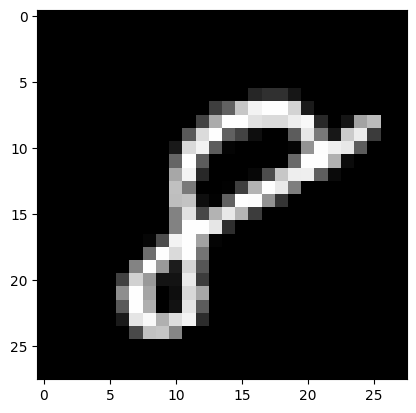

In [ ]:
# imshow : 이미지 데이터를 그림으로 출력해주는 함수
# camp = 'gray' : 이미지를 흑백으로 전환시켜주는 인자
plt.imshow(X_train[59999], cmap = 'gray');

In [ ]:
print(X_train[59999])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

### 정답 데이터 원 핫 인코딩
- pd.get_dummies : 판다스에서 지원하는 원핫인코딩
- to_categorical : keras에서 지원하는 원핫인코딩

In [ ]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

- 인공신경망에는 2차원인 이미지데이터를 한 번에 넣을 수 없기 때문에 데이터의 차원을 전부 1차원으로 변경시켜준 뒤 학습시켜야함 !

In [ ]:
# -1은 60000을 제외한 나머지값들을 다 곱해서 하나의 차원으로 만들어줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [ ]:
X_train.shape, X_test.shape
# 이미지는 픽셀 하나하나가 데이터의 특성으로 인지됨

((60000, 784), (10000, 784))

### 신경망 모델링
- 직접 모델링해보자 ~

In [ ]:
# 입력되는 특성 수
# 출력층 활성화 함수, 뉴런 수
# loss함수
# 최적화함수(Adam, SGD 둘 다 사용해보기)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화 함수(들어온 자극(데이터)에 대한 응답 여부를 설정하는 함수)
model.add(Dense(500, input_dim = 784, activation = 'sigmoid'))

# 중간층
model.add(Dense(300, activation = 'sigmoid')) # 하나의 층
model.add(Dense(150, activation = 'sigmoid')) # 하나의 층
model.add(Dense(75, activation = 'sigmoid')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 75)                11325     
                                                                 
 dense_4 (Dense)             (None, 10)                760       
                                                                 
Total params: 600,035
Trainable params: 600,035
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
# -> 오차의 평균을 구하는 것은 mse와 같지만 0~1사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [ ]:
h = model.fit(X_train, y_train_one_hot,
              epochs = 30,
              batch_size = 128, # 한번에 학습되는 데이터의 개수(디폴트 32개)
              verbose = 1 # 학습 결과의 출력 형태 결정(0 : 출력 X, 1 : bar형태(디폴트), 2 : bar없이 출력)
              )

Epoch 1/30
1875/1875 [==============================] - 18s 6ms/step - loss: 0.5426 - acc: 0.8410
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3136 - acc: 0.9026
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2748 - acc: 0.9133
Epoch 4/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2378 - acc: 0.9251
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2255 - acc: 0.9285
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2093 - acc: 0.9356
Epoch 7/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1970 - acc: 0.9384
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1800 - acc: 0.9431
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1693 - acc: 0.9470
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1610 - acc: 0.9481
Epoch 11/30
1875/1875 [====

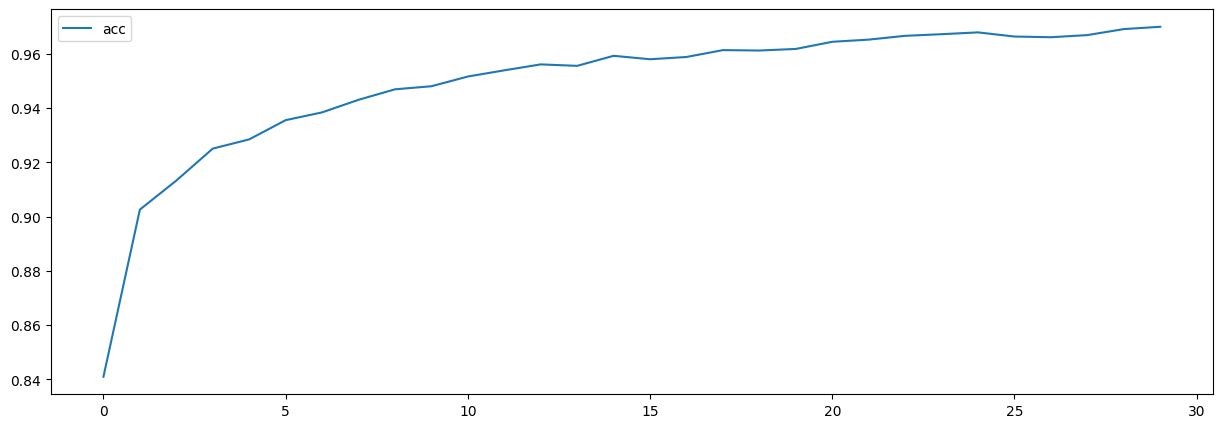

In [ ]:
# 3. 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 0.1221 - acc: 0.9641


[0.12213896214962006, 0.9641000032424927]

### 과대적합을 확인하기위해 train 데이터에서 validation데이터를 분리해서 학습시 같이 출력해보자 !

In [ ]:
# 무조건 train, test만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고있음.
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, y_train_one_hot, y_validation_one_hot = train_test_split(X_train, y_train_one_hot,
                                                                                random_state = 33
                                                                                )

In [ ]:
print(X_train.shape)
print(X_validation.shape)
print(y_train_one_hot.shape)
print(y_validation_one_hot.shape)

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [ ]:
# 신경망 구조 설계
model1 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
model1.add(Dense(500, input_dim = 784, activation = 'sigmoid'))

# 중간층
model1.add(Dense(300, activation = 'sigmoid')) # 하나의 층
model1.add(Dense(150, activation = 'sigmoid')) # 하나의 층
model1.add(Dense(75, activation = 'sigmoid')) # 하나의 층

# 출력층
model1.add(Dense(10, activation = 'softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               392500    
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dense_7 (Dense)             (None, 150)               45150     
                                                                 
 dense_8 (Dense)             (None, 75)                11325     
                                                                 
 dense_9 (Dense)             (None, 10)                760       
                                                                 
Total params: 600,035
Trainable params: 600,035
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h1 = model1.fit(X_train, y_train_one_hot,
                batch_size = 128,
                epochs = 30,
                validation_data = (X_validation, y_validation_one_hot) # 검증용 데이터셋 추가
                )

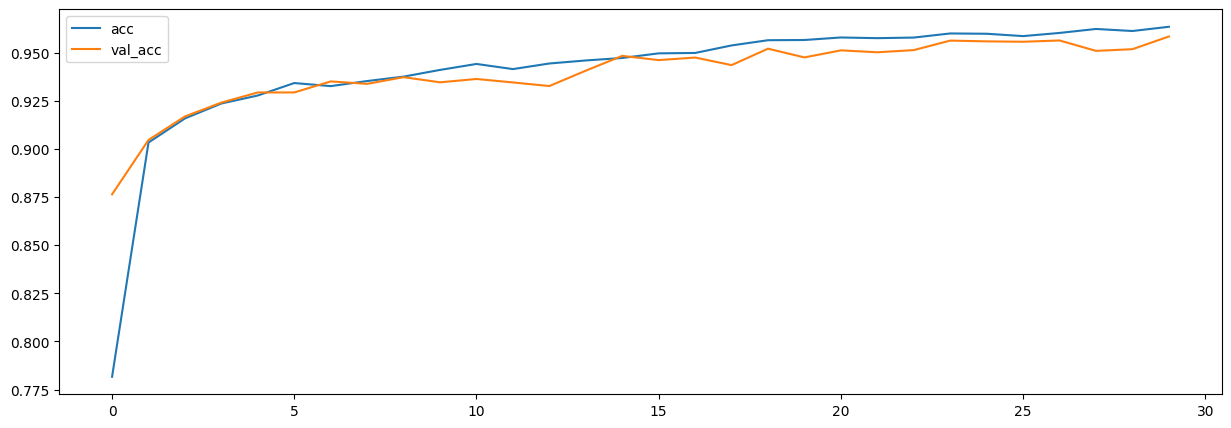

In [ ]:
# 3. 시각화
plt.figure(figsize = (15, 5))
# train 데이터
plt.plot(h1.history['acc'], label = 'acc')
# validation 데이터
plt.plot(h1.history['val_acc'], label = 'val_acc')

plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.1350 - acc: 0.9593


[0.13498809933662415, 0.9592999815940857]